# Pandas 
* https://pandas.pydata.org/pandas-docs/version/1.0.0/getting_started/10min.html
* (한국어) https://dataitgirls2.github.io/10minutes2pandas/
* https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf


## 공식문서(도움말) 활용하기
* pd.DataFrame?
* pd.DataFrame(shift+tab+tab)

In [1]:
import pandas as pd 

# DataFrame

In [3]:
pd.DataFrame?

Init signature:
pd.DataFrame(
    data=None,
    index: 'Axes | None' = None,
    columns: 'Axes | None' = None,
    dtype: 'Dtype | None' = None,
    copy: 'bool | None' = None,
)
Docstring:     
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index.

    .. versionchanged:: 0.25.0
       If data is a list of dicts, column order follows insertion-order.

index : Index or array-like
    Index to use for resulting frame. Will default to 

In [35]:
df = pd.DataFrame(
    {"a" : [1,2,3,3], 
     "b" : [4,5,6,6],
     "c" : [7,8,9,7],
     "d" : [10,11,12,10]},
     index = [1,2,3,4]
)
df

,a,b,c,d
1,1,4,7,10
2,2,5,8,11
3,3,6,9,12
4,3,6,7,10


# Series

In [36]:
# series : 1차원 구조
df['a']

1    1
2    2
3    3
4    3
Name: a, dtype: int64

In [37]:
# dataframe : 2차원 구조
df[['a']]

,a
1,1
2,2
3,3
4,3


# Subset

In [38]:
df['b']>4

1    False
2     True
3     True
4     True
Name: b, dtype: bool

In [39]:
df[df['b']>4]

,a,b,c,d
2,2,5,8,11
3,3,6,9,12
4,3,6,7,10


In [40]:
df['a']

1    1
2    2
3    3
4    3
Name: a, dtype: int64

In [41]:
# 두개 이상의 컬럼 값 가져올때
df[['a','b']]

,a,b
1,1,4
2,2,5
3,3,6
4,3,6


In [42]:
df['b'].value_counts()

6    2
4    1
5    1
Name: b, dtype: int64

In [43]:
df['b'].unique()

array([4, 5, 6], dtype=int64)

# Summarize Data

## Reshaping
### sort_values, drop

In [44]:
df['a'].value_counts()

3    2
1    1
2    1
Name: a, dtype: int64

In [45]:
df['a'].sort_values()

1    1
2    2
3    3
4    3
Name: a, dtype: int64

In [48]:
len(df)

4

In [46]:
df.sort_values('a')

,a,b,c,d
1,1,4,7,10
2,2,5,8,11
3,3,6,9,12
4,3,6,7,10


In [47]:
df.sort_values('a', ascending=False)

,a,b,c,d
3,3,6,9,12
4,3,6,7,10
2,2,5,8,11
1,1,4,7,10


In [50]:
# 기본옵션은 행 기준 drop
# 컬럼 삭제시에는 axis=1
# df = df.drop(['c'],axis=1) 해야 df에 적용됨
df.drop(['c'],axis=1)

,a,b,d
1,1,4,10
2,2,5,11
3,3,6,12
4,3,6,10


# Group Data

## Groupby, pivot_table

In [52]:
# a값으로 groupby 진행 한 후 b 값의 평균내기
df.groupby(['a'])['b'].mean()

a
1    4.0
2    5.0
3    6.0
Name: b, dtype: float64

In [53]:
df.groupby(['a'])['b'].agg(['mean','sum','count'])

,mean,sum,count
a,,,
1,4.0,4,1
2,5.0,5,1
3,6.0,12,2


In [54]:
df.groupby(['a'])['b'].describe()

,count,mean,std,min,25%,50%,75%,max
a,,,,,,,,
1,1.0,4.0,NaN,4.0,4.0,4.0,4.0,4.0
2,1.0,5.0,NaN,5.0,5.0,5.0,5.0,5.0
3,2.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0


In [56]:
df

,a,b,c,d
1,1,4,7,10
2,2,5,8,11
3,3,6,9,12
4,3,6,7,10


In [55]:
pd.pivot_table(df, index = 'a')

,b,c,d
a,,,
1,4,7,10
2,5,8,11
3,6,8,11


In [57]:
pd.pivot_table(df, index = 'a',values = 'b', aggfunc = 'sum')

,b
a,
1,4
2,5
3,12


# plotting 

<AxesSubplot:>

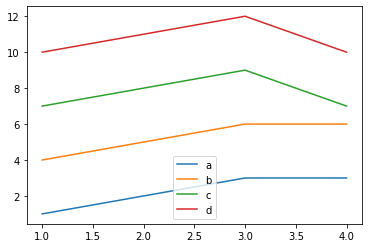

In [59]:
df.plot()

<AxesSubplot:>

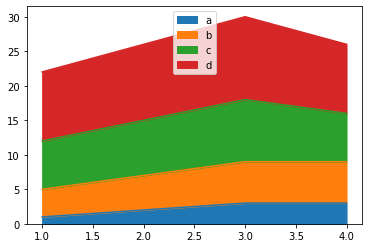

In [60]:
df.plot.area()

<AxesSubplot:>

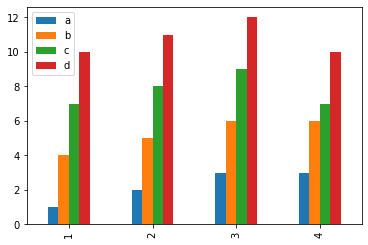

In [62]:
df.plot.bar()

<AxesSubplot:ylabel='Density'>

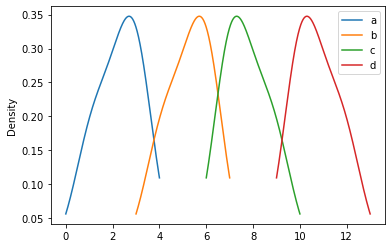

In [63]:
df.plot.density()